# References

# Importing libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
%matplotlib inline

# Load data

In [160]:
df_cars=pd.read_excel("E:/data/work/Cars.xls")

In [161]:
df_cars.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,US


# Exploratory Data Analysis and Preprocessing of Data

Identification of data types

In [162]:
df_cars.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

Size of the dataset

In [163]:
df_cars.shape

(394, 9)

Statistical Summary of Numeric Variables

In [164]:
df_cars.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year
count,394.000000,394.000000,394.000000,392.000000,394.000000,394.000000,394.000000
mean,23.472843,5.464467,194.062183,104.469388,2976.060914,15.554569,76.007614
std,7.805051,1.704658,104.508345,38.491160,847.891143,2.763179,3.695461
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.000000,2226.500000,13.800000,73.000000
50%,23.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,265.750000,126.000000,3612.000000,17.075000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Non-Graphical Univariate Analysis

To get the count of unique values

In [165]:
df_cars['Cylinders'].value_counts()

4    201
8    103
6     83
3      4
5      3
Name: Cylinders, dtype: int64

In [166]:
#df_cars['Horsepower'].value_counts()

To get the list and number of unique values

In [167]:
df_cars['Cylinders'].nunique()

5

In [168]:
df_cars['Cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

Filtering based on Conditions

In [169]:
df_cars[(df_cars['Cylinders'] == 5)]

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
272,audi 5000,20.3,5,131.0,103.0,2830,15.9,78,Europe
295,mercedes benz 300d,25.4,5,183.0,77.0,3530,20.1,79,Europe
325,audi 5000s (diesel),36.4,5,121.0,67.0,2950,19.9,80,Europe


Finding null values

In [170]:
df_cars.apply(lambda x: sum(x.isnull()),axis=0)

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

In [171]:
df_cars.isnull().sum()

Model           0
MPG             0
Cylinders       0
Displacement    0
Horsepower      2
Weight          0
Acceleration    0
Year            0
Origin          0
dtype: int64

Treating Null Values

If the missing value isn’t identified as NaN , then we have to first convert or replace such non NaN entry with a NaN.

In [172]:
#data_frame['column_name'].replace(0, np.nan, inplace= True)

Dropping Null or Missing Value

In [173]:
#df_cars.dropna(inplace=True)

In [174]:
#len(df_cars)

Filling missing value

In [175]:
#Filling with Mean
mean_value=df_cars['Horsepower'].mean()
df_cars['Horsepower']=df_cars['Horsepower'].fillna(mean_value)

#Filling with Median
#meadian_value=df_cars['Horsepower'].median()
#df_cars['Horsepower']=df_cars['Horsepower'].fillna(median_value)

For Back-fill or forward-fill to propagate next or previous values respectively

In [176]:
#for back fill 
#df_cars.fillna(method='bfill')
#for forward-fill
#df_cars.fillna(method='ffill')
#one can also specify an axis to propagate (1 is for rows and 0 is for columns)
#df_cars.fillna(method='bfill', axis=1)

Alternative way of filling missing value with test statistic is by using our Imputer method found in sklearn.preprocessing

In [177]:
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit(train)
#train= imp.transform(train)
#This will look for all columns where we have NaN value and replace the NaN value with specified test statistic.
#for mode we specify strategy='most_frequent'
#train is the dataset used for training the model

Data Type Conversion using to_datetime() and astype() methods

In [178]:
#df_cars['Year']= pd.to_datetime(df_cras['Year'])

In [179]:
#df_cars['Displacement'] = df_cras['Displacement'].astype('int64')

# Graphical Univariate Analysis

Histogram

Histograms are one of the most common graphs used to display numeric data. Two important things we can learn from a histogram:
distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right)
To identify outliers — Extremely low or high values that do not fall near any other data points

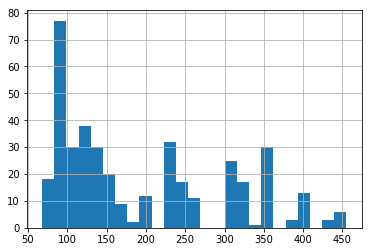

In [180]:
df_cars['Displacement'].hist(bins=25)

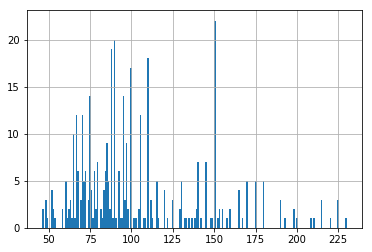

In [181]:
df_cars['Horsepower'].hist(bins=200)

Box Plots

A Box Plot is the visual representation of the statistical summary of a given data set.
The Summary includes:
Minimum
First Quartile
Median (Second Quartile)
Third Quartile
Maximum
It is also used to identify the outliers in the dataset

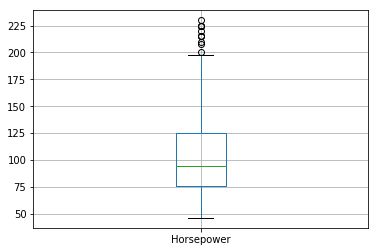

In [182]:
df_cars.boxplot(column='Horsepower')

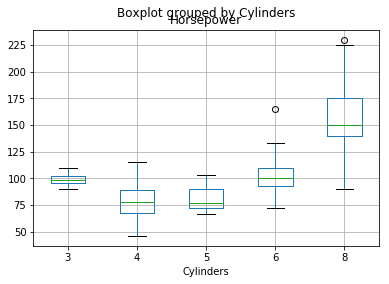

In [183]:
df_cars.boxplot(column='Horsepower', by = 'Cylinders')

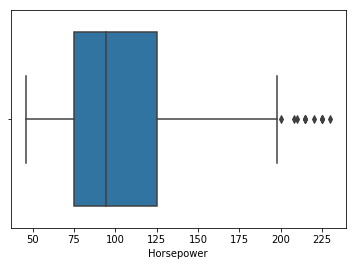

In [184]:
sns.boxplot(x=df_cars['Horsepower'])

Count Plots

A count plot can be thought of as a histogram across a categorical, instead of numeric, variable. It is used to find the frequency of each category.

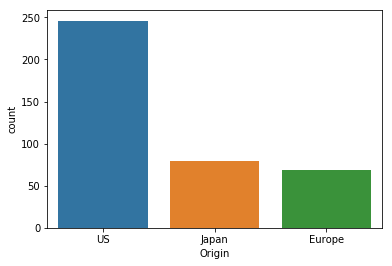

In [185]:
sns.countplot(df_cars.Origin)

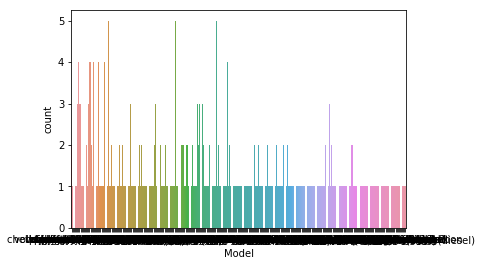

In [186]:
sns.countplot(df_cars.Model)

Scatter Plot

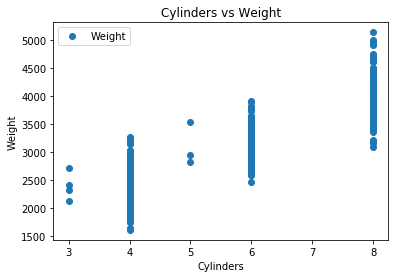

In [187]:
df_cars.plot(x='Cylinders', y='Weight', style='o')  
plt.title('Cylinders vs Weight')  
plt.xlabel('Cylinders')  
plt.ylabel('Weight')  
plt.show()

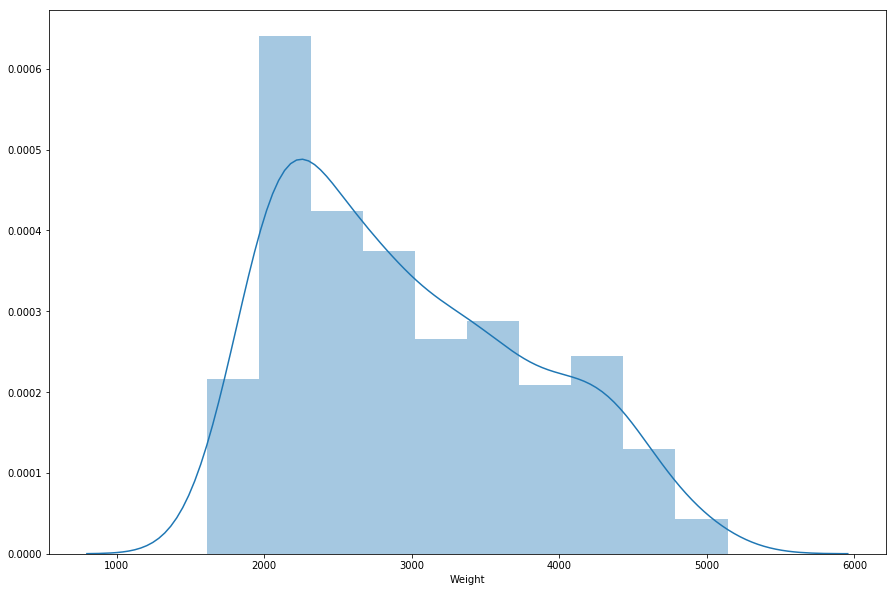

In [188]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_cars['Weight'])

In [189]:
#We have to find the covariance and important variables(dimensions).
# Some algorithms for Dimensionality Reduction

# Creating Predictor(input variable) and Label(output variable)

Convert Categorical data to Numeric data

In [190]:
df_cars = pd.get_dummies(df_cars, columns=['Origin'])

In [191]:
columns_to_consider=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Year', 'Origin_Europe', 'Origin_Japan', 'Origin_US']

In [192]:
X = df_cars[columns_to_consider].values
y = df_cars['MPG'].values

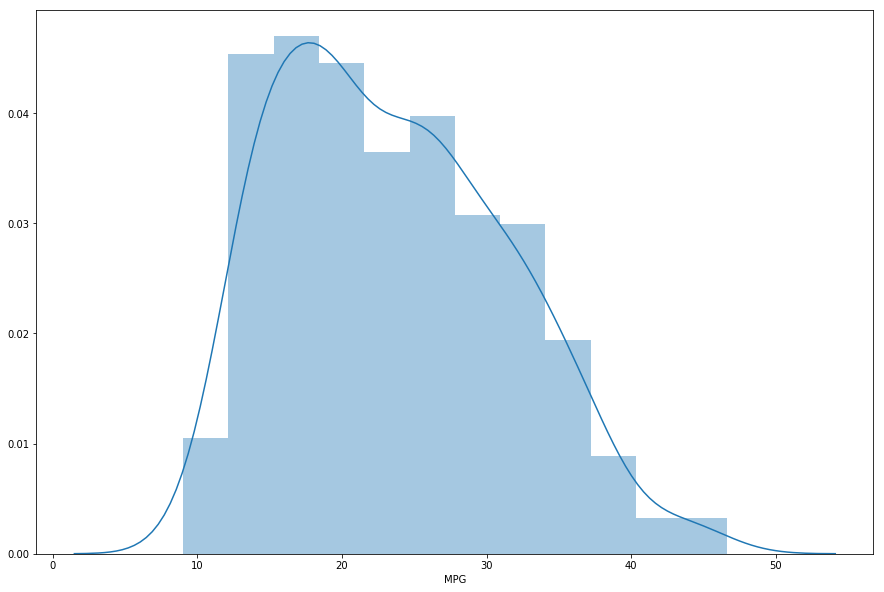

In [193]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df_cars['MPG'])

Split the data in train and test

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [195]:
# Model initialization
regression_model = LinearRegression() 
# Fit the data(train the model)
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
columns_to_consider.append('Intercept')

In [197]:
columns_to_consider

['Cylinders',
 'Displacement',
 'Horsepower',
 'Weight',
 'Acceleration',
 'Year',
 'Origin_Europe',
 'Origin_Japan',
 'Origin_US',
 'Intercept']

In [198]:
coeff_df = pd.DataFrame({'Predictor':columns_to_consider, 'Coefficient':np.append(regression_model.coef_,regression_model.intercept_)})  


In [199]:
coeff_df

,Predictor,Coefficient
0,Cylinders,-0.367128
1,Displacement,0.026420
2,Horsepower,-0.025832
3,Weight,-0.006988
4,Acceleration,0.058776
5,Year,0.791484
6,Origin_Europe,1.019668
7,Origin_Japan,0.887639
8,Origin_US,-1.907307
9,Intercept,-16.369785


# prediction on test data

In [200]:
y_pred = regression_model.predict(X_test)

In [201]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

Plot the comparison

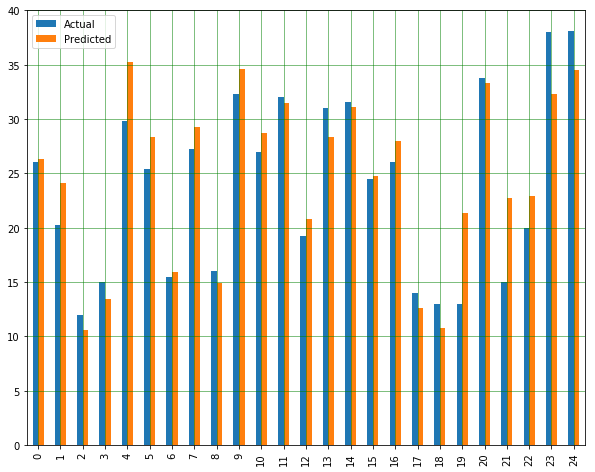

In [202]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Evaluate the performance of Algorithm

In [203]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 2.2795052064276806
Mean Squared Error: 8.79437274850147
Root Mean Squared Error: 2.965530770115439


In [204]:
coeff_df.to_csv("E:/data/work/Cars_coefficient.csv", index=False)